# Loading data

In [2]:
##loading data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data='/Users/ssarkar/Desktop/data.csv'
df=pd.read_csv(data)
df.head()

,experiment_id,created_date,spent,impressions,leads,mqls,daily_budget,experiment_goal,wiz_campaign_channel,offer_library_type,ad_library_type
0,1177400,2007-01-23,46.94,311.0,0,0,9.23,CPL,LINKEDIN,LG,IMAGE
1,1280036,2007-01-23,7.40,6.0,0,0,200.00,CPL,LINKEDIN,LG,CONVO
2,1280036,2007-01-23,14.80,9.0,0,0,200.00,CPL,LINKEDIN,LG,CONVO
3,1280036,2007-01-23,0.00,0.0,0,0,0.00,CPL,LINKEDIN,LG,CONVO
4,1280036,2007-01-23,7.30,6.0,0,0,200.00,CPL,LINKEDIN,LG,CONVO


# Data cleaning & exploratory analysis

In [3]:
## converting created_date to a datetime field
df['created_date'] = pd.to_datetime(df['created_date'])


In [4]:
## impression columpn has 2 null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12908 entries, 0 to 12907
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   experiment_id         12908 non-null  int64         
 1   created_date          12908 non-null  datetime64[ns]
 2   spent                 12908 non-null  float64       
 3   impressions           12906 non-null  float64       
 4   leads                 12908 non-null  int64         
 5   mqls                  12908 non-null  int64         
 6   daily_budget          12908 non-null  float64       
 7   experiment_goal       12908 non-null  object        
 8   wiz_campaign_channel  12908 non-null  object        
 9   offer_library_type    12908 non-null  object        
 10  ad_library_type       12908 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 1.1+ MB


In [5]:
#since there are only two null values for impression, populating them witht the average impression of the corresponding experiment
#assumption here is that someone someone forgot to populate those values instead of those experiment having 0 impression

# Compute the mean impression for each experiment
experiment_mean_impressions = df.groupby('experiment_id')['impressions'].mean()

# Define a function to fill null values with the mean of the corresponding experiment
def fill_null_with_experiment_mean(row):
    if pd.isnull(row['impressions']):
        return experiment_mean_impressions[row['experiment_id']]
    else:
        return row['impressions']

# Apply the function to fill null values in the impression column
df['impressions'] = df.apply(fill_null_with_experiment_mean, axis=1)

In [7]:
# there 760 unquie experiments

experiment_counts = df['experiment_id'].value_counts().reset_index()
experiment_counts.columns = ['experiment_id', 'count']
print(experiment_counts)

     experiment_id  count
0          1280038    131
1          1306942    123
2          1321577    119
3          1321576    119
4          1321598    119
..             ...    ...
755        1400486      1
756        1398603      1
757        1457772      1
758        1380479      1
759        1177400      1

[760 rows x 2 columns]


In [6]:
## impression has a high std, there might be possible outliars
df.describe()

,experiment_id,spent,impressions,leads,mqls,daily_budget
count,1.290800e+04,12908.000000,12908.000000,12908.000000,12908.000000,12908.000000
mean,1.376806e+06,38.186250,1159.002066,0.168190,0.051983,58.025208
std,5.824063e+04,69.499072,1995.883927,0.882228,0.284421,126.943540
min,1.177399e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.323686e+06,9.920000,93.000000,0.000000,0.000000,10.000000
50%,1.398281e+06,16.770000,693.000000,0.000000,0.000000,20.000000
75%,1.417949e+06,38.982500,1373.000000,0.000000,0.000000,50.000000
max,1.468106e+06,1090.730000,35474.000000,20.000000,5.000000,3146.520000


In [9]:
outlier_spend=df[df['spent']>1000]
print(outlier_spend)

       experiment_id created_date    spent  impressions  leads  mqls  \
6793         1349669   2023-09-17  1071.02       4132.0      0     0   
6802         1349669   2023-09-17  1068.77       5246.0      3     3   
6848         1349669   2023-09-18  1072.59       3267.0      3     3   
10909        1394188   2023-12-13  1090.73       6590.0      1     1   
12058        1412318   2023-12-24  1048.59      14314.0      1     1   

       daily_budget experiment_goal wiz_campaign_channel offer_library_type  \
6793         944.58             CPL             LINKEDIN                 LG   
6802        1069.03             CPL             LINKEDIN                 LG   
6848         701.95             CPL             LINKEDIN                 LG   
10909        982.17             CPL             LINKEDIN                 LG   
12058       1735.72             CPL            INSTAGRAM                 LP   

      ad_library_type  
6793            IMAGE  
6802            IMAGE  
6848            IMAG

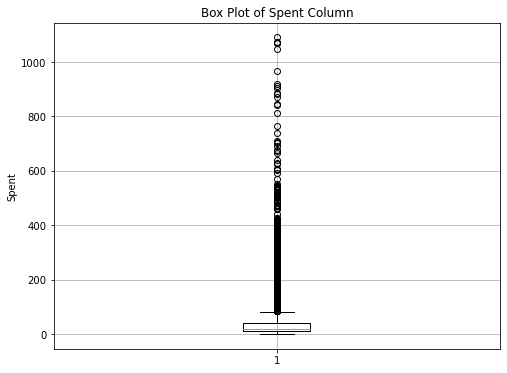

In [8]:
#checking outliars

plt.figure(figsize=(8, 6))  
plt.boxplot(df['spent'])
plt.title('Box Plot of Spent Column')
plt.ylabel('Spent')
plt.grid(True)
plt.show()


In [11]:
outlier_impression=df[df['impressions']>35000]
print(outlier_impression)

      experiment_id created_date   spent  impressions  leads  mqls  \
4065        1399214   2012-07-23  918.90      35474.0     11     0   
9770        1347822   2023-11-19  505.14      35349.0     14     0   

      daily_budget experiment_goal wiz_campaign_channel offer_library_type  \
4065        537.69             CPL             LINKEDIN                 LG   
9770        507.15             CPL             LINKEDIN                 LG   

     ad_library_type  
4065           IMAGE  
9770           IMAGE  


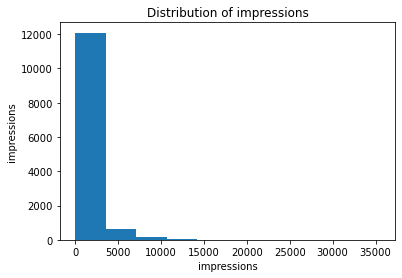

In [10]:
plt.hist(df['impressions'])
plt.xlabel('impressions')
plt.ylabel('impressions')
plt.title('Distribution of impressions')
plt.show()

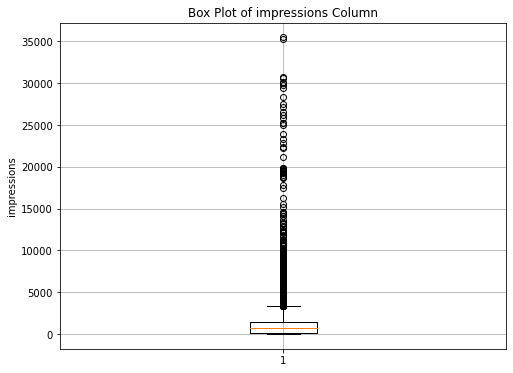

In [75]:
#checking outliars

plt.figure(figsize=(8, 6))  
plt.boxplot(df['impressions'])
plt.title('Box Plot of impressions Column')
plt.ylabel('impressions')
plt.grid(True)
plt.show()


In [78]:
## droping impression over 35k as they seem to be off from the rest of the data
df = df[df['impressions'] <= 35000]


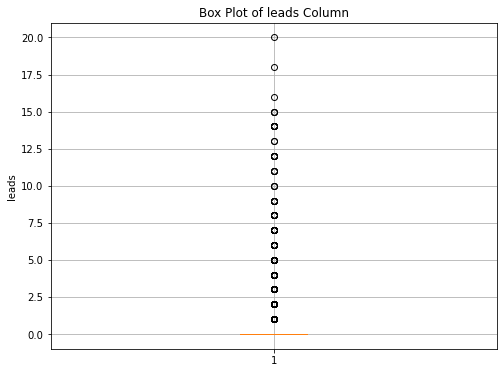

In [12]:
plt.figure(figsize=(8, 6))  
plt.boxplot(df['leads'])
plt.title('Box Plot of leads Column')
plt.ylabel('leads')
plt.grid(True)
plt.show()


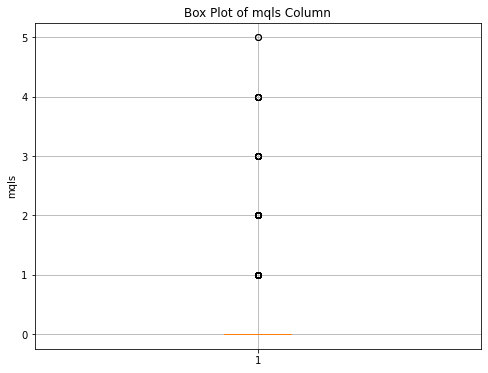

In [13]:
plt.figure(figsize=(8, 6))  
plt.boxplot(df['mqls'])
plt.title('Box Plot of mqls Column')
plt.ylabel('mqls')
plt.grid(True)
plt.show()


In [14]:
# Although, there are spend, lead, and mqls that are outside the whiskers of a boxplot 
# when trying to detect outliers, I did not consider them outliers as they don't seem to be far different from 
# remaining of the sample data, meaning there is a continuity and makes me think they are not outliers.

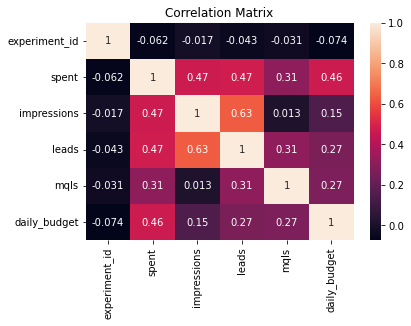

In [15]:
#checking corelation among features 

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# campaign analysis 

In [16]:
##seemps only CPL campaign has leads and MQls which speaks to the goal of the campign
grouped_experiment_goal = df.groupby('experiment_goal')[['spent','impressions','leads','mqls']].sum()
print(grouped_experiment_goal)


                         spent   impressions  leads  mqls
experiment_goal                                          
CPL              347202.369141  5.011384e+06   2171   671
CTR              145705.751641  9.949015e+06      0     0


In [17]:
grouped_offer_library_type = df.groupby('offer_library_type')[['spent','impressions','leads','mqls']].sum()
print(grouped_offer_library_type)

                            spent   impressions  leads  mqls
offer_library_type                                          
LG                  296585.171766  4.177564e+06   1917   648
LP                  196322.949016  1.078283e+07    254    23


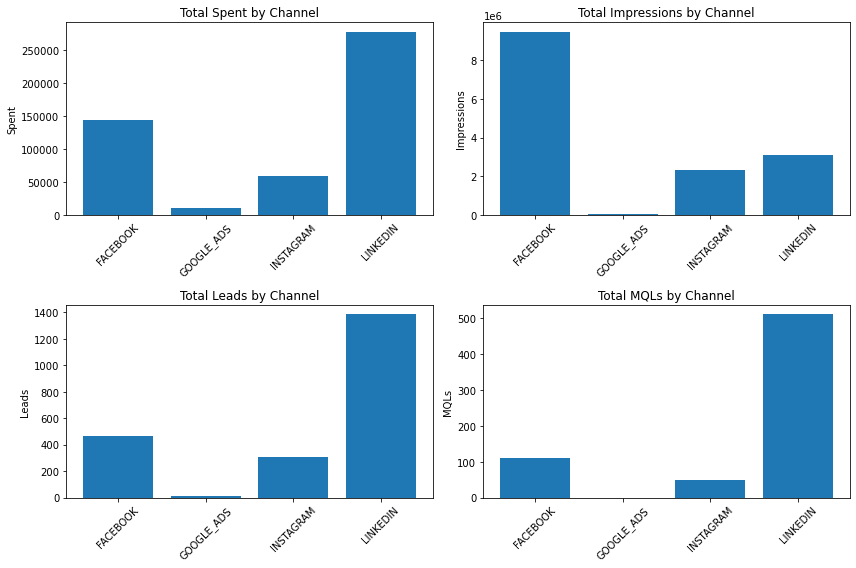

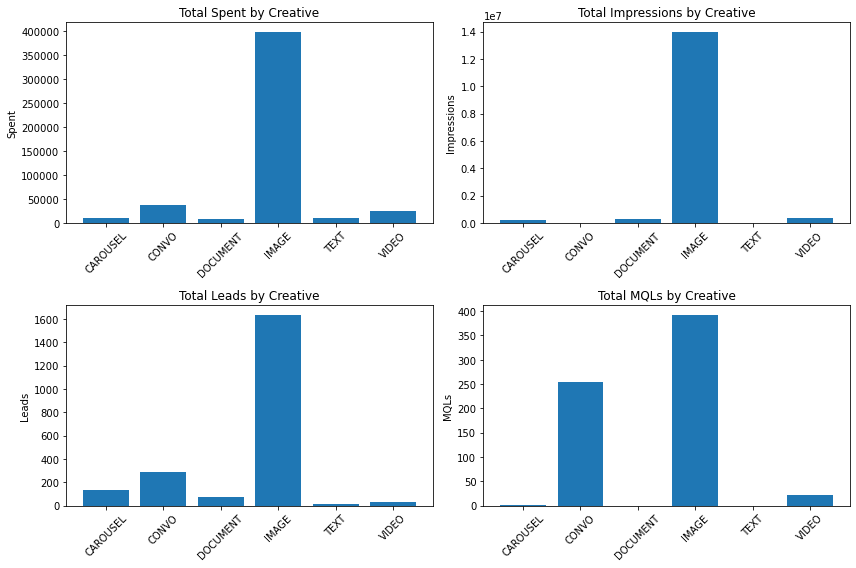

In [18]:
## plot campaign performance by channel and ad_library_type

grouped_by_channel = df.groupby('wiz_campaign_channel')

#  Aggregate Metrics for Channel
agg_data_channel = grouped_by_channel.agg({
    'spent': 'sum',
    'impressions': 'sum',
    'leads': 'sum',
    'mqls': 'sum'
}).reset_index()

#  Visualize Trends for Channel
plt.figure(figsize=(12, 8))

# Plot for Spent by Channel
plt.subplot(2, 2, 1)
plt.bar(agg_data_channel['wiz_campaign_channel'], agg_data_channel['spent'])
plt.title('Total Spent by Channel')
plt.xticks(rotation=45)
plt.ylabel('Spent')

# Plot for Impressions by Channel
plt.subplot(2, 2, 2)
plt.bar(agg_data_channel['wiz_campaign_channel'], agg_data_channel['impressions'])
plt.title('Total Impressions by Channel')
plt.xticks(rotation=45)
plt.ylabel('Impressions')

# Plot for Leads by Channel
plt.subplot(2, 2, 3)
plt.bar(agg_data_channel['wiz_campaign_channel'], agg_data_channel['leads'])
plt.title('Total Leads by Channel')
plt.xticks(rotation=45)
plt.ylabel('Leads')

# Plot for MQLs by Channel
plt.subplot(2, 2, 4)
plt.bar(agg_data_channel['wiz_campaign_channel'], agg_data_channel['mqls'])
plt.title('Total MQLs by Channel')
plt.xticks(rotation=45)
plt.ylabel('MQLs')

plt.tight_layout()
plt.show()

# Group by Creative
grouped_by_creative = df.groupby('ad_library_type')

# Step 5: Aggregate Metrics for Creative
agg_data_creative = grouped_by_creative.agg({
    'spent': 'sum',
    'impressions': 'sum',
    'leads': 'sum',
    'mqls': 'sum'
}).reset_index()

#  Visualize Trends for Creative
plt.figure(figsize=(12, 8))

# Plot for Spent by Creative
plt.subplot(2, 2, 1)
plt.bar(agg_data_creative['ad_library_type'], agg_data_creative['spent'])
plt.title('Total Spent by Creative')
plt.xticks(rotation=45)
plt.ylabel('Spent')

# Plot for Impressions by Creative
plt.subplot(2, 2, 2)
plt.bar(agg_data_creative['ad_library_type'], agg_data_creative['impressions'])
plt.title('Total Impressions by Creative')
plt.xticks(rotation=45)
plt.ylabel('Impressions')

# Plot for Leads by Creative
plt.subplot(2, 2, 3)
plt.bar(agg_data_creative['ad_library_type'], agg_data_creative['leads'])
plt.title('Total Leads by Creative')
plt.xticks(rotation=45)
plt.ylabel('Leads')

# Plot for MQLs by Creative
plt.subplot(2, 2, 4)
plt.bar(agg_data_creative['ad_library_type'], agg_data_creative['mqls'])
plt.title('Total MQLs by Creative')
plt.xticks(rotation=45)
plt.ylabel('MQLs')

plt.tight_layout()
plt.show()

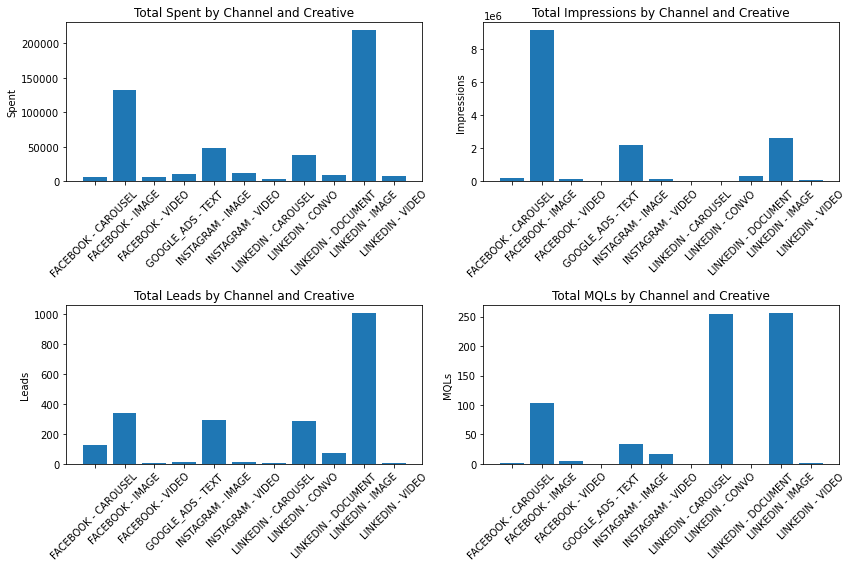

In [19]:
# Group by Channel and Creative together
grouped_data = df.groupby(['wiz_campaign_channel', 'ad_library_type'])

# Aggregate Metrics
agg_data = grouped_data.agg({
    'spent': 'sum',
    'impressions': 'sum',
    'leads': 'sum',
    'mqls': 'sum'
}).reset_index()

# Visualize Trends
plt.figure(figsize=(12, 8))

# Plot for Spent
plt.subplot(2, 2, 1)
plt.bar(agg_data.index, agg_data['spent'])
plt.title('Total Spent by Channel and Creative')
plt.xticks(agg_data.index, agg_data['wiz_campaign_channel'] + ' - ' + agg_data['ad_library_type'], rotation=45)
plt.ylabel('Spent')

# Plot for Impressions
plt.subplot(2, 2, 2)
plt.bar(agg_data.index, agg_data['impressions'])
plt.title('Total Impressions by Channel and Creative')
plt.xticks(agg_data.index, agg_data['wiz_campaign_channel'] + ' - ' + agg_data['ad_library_type'], rotation=45)
plt.ylabel('Impressions')

# Plot for Leads
plt.subplot(2, 2, 3)
plt.bar(agg_data.index, agg_data['leads'])
plt.title('Total Leads by Channel and Creative')
plt.xticks(agg_data.index, agg_data['wiz_campaign_channel'] + ' - ' + agg_data['ad_library_type'], rotation=45)
plt.ylabel('Leads')

# Plot for MQLs
plt.subplot(2, 2, 4)
plt.bar(agg_data.index, agg_data['mqls'])
plt.title('Total MQLs by Channel and Creative')
plt.xticks(agg_data.index, agg_data['wiz_campaign_channel'] + ' - ' + agg_data['ad_library_type'], rotation=45)
plt.ylabel('MQLs')

plt.tight_layout()
plt.show()

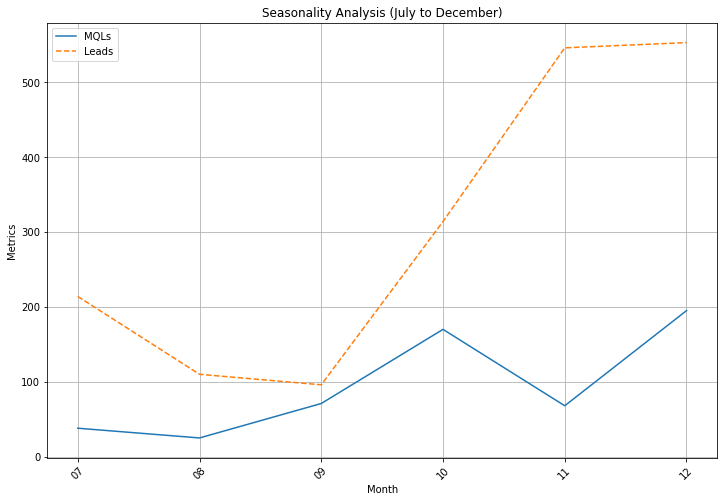

In [81]:
# Filter data for the desired months (July to December)
filtered_data = df[df['created_date'].dt.month.between(7, 12)]

# Group by month and aggregate metrics
grouped_data = filtered_data.groupby(filtered_data['created_date'].dt.strftime('%m')).agg({
    'leads': 'sum',
    'mqls': 'sum'
}).reset_index()

# Plot the trend for each metric
plt.figure(figsize=(12, 8))

# Plot MQLs
plt.plot(grouped_data['created_date'], grouped_data['mqls'], label='MQLs')

# Plot Leads separately
plt.plot(grouped_data['created_date'], grouped_data['leads'], label='Leads', linestyle='dashed')

plt.title('Seasonality Analysis (July to December)')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.legend()
plt.grid(True)
plt.show()

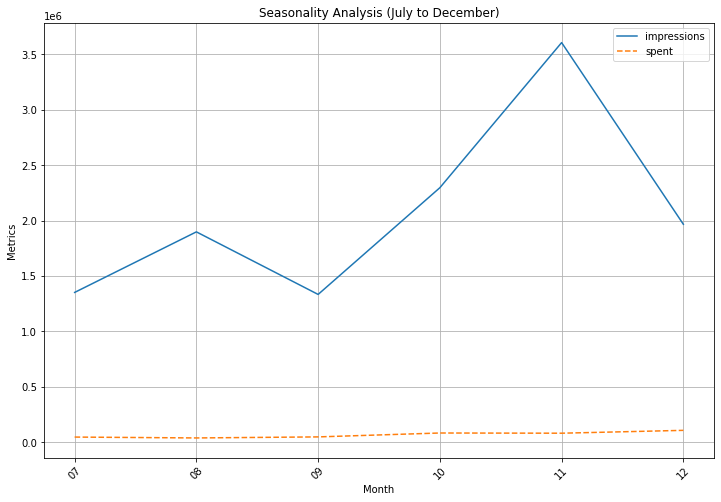

In [84]:
# Filter data for the desired months (July to December)
filtered_data = df[df['created_date'].dt.month.between(7, 12)]

# Group by month and aggregate metrics
grouped_data = filtered_data.groupby(filtered_data['created_date'].dt.strftime('%m')).agg({
    'impressions': 'sum',
    'spent': 'sum'
}).reset_index()

# Plot the trend for each metric
plt.figure(figsize=(12, 8))

# Plot MQLs
plt.plot(grouped_data['created_date'], grouped_data['impressions'], label='impressions')

# Plot Leads separately
plt.plot(grouped_data['created_date'], grouped_data['spent'], label='spent', linestyle='dashed')

plt.title('Seasonality Analysis (July to December)')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.legend()
plt.grid(True)
plt.show()

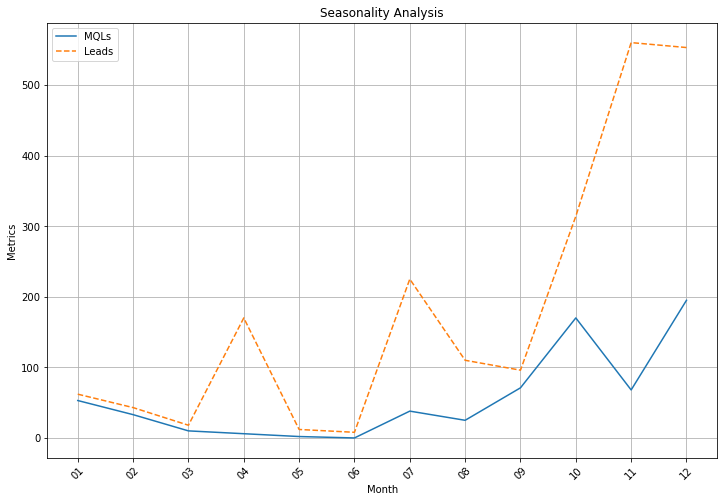

In [21]:
# since data in 2023 is not complete for the whole year and 2013-22 is missing, thus this view only includes 2007-2012

# doing leads and MQL seperately as impression scale is way higher than the rest of the metrics
filtered_data = df[df['created_date'].dt.year.between(2007, 2012)]

# Group by month and aggregate metrics
grouped_data = df.groupby(df['created_date'].dt.strftime('%m')).agg({
    'leads': 'sum',
    'mqls': 'sum'
}).reset_index()

# Plot the trend for each metric
plt.figure(figsize=(12, 8))

# Plot MQLs
plt.plot(grouped_data['created_date'], grouped_data['mqls'], label='MQLs')

# Plot Leads separately
plt.plot(grouped_data['created_date'], grouped_data['leads'], label='Leads', linestyle='dashed')

plt.title('Seasonality Analysis')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.legend()
plt.grid(True)
plt.show()

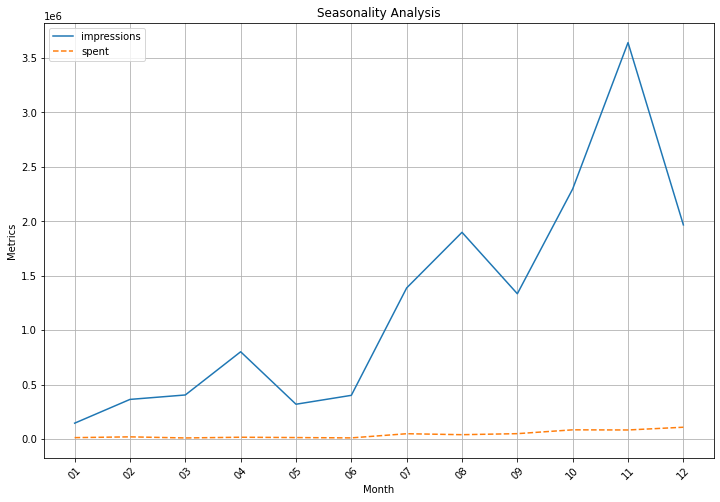

In [22]:

filtered_data = df[df['created_date'].dt.year.between(2007, 2012)]

# Group by month and aggregate metrics
grouped_data = df.groupby(df['created_date'].dt.strftime('%m')).agg({
    'impressions': 'sum',
    'spent': 'sum'
}).reset_index()

# Plot the trend for each metric
plt.figure(figsize=(12, 8))

# Plot MQLs
plt.plot(grouped_data['created_date'], grouped_data['impressions'], label='impressions')

# Plot Leads separately
plt.plot(grouped_data['created_date'], grouped_data['spent'], label='spent', linestyle='dashed')

plt.title('Seasonality Analysis')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.legend()
plt.grid(True)
plt.show()

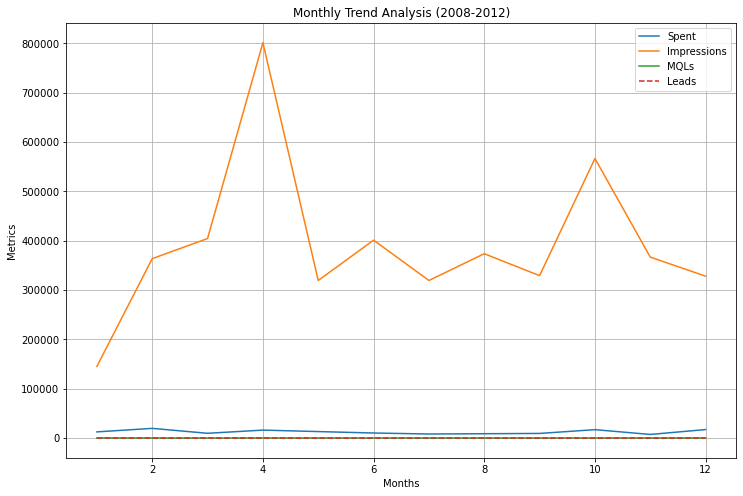

In [23]:
# view with impression,spent,leads,mqls

filtered_data = df[df['created_date'].dt.year.between(2007, 2012)]

# Group by year and aggregate metrics
yearly_grouped_data = filtered_data.groupby(filtered_data['created_date'].dt.month).agg({
    'spent': 'sum',
    'impressions': 'sum',
    'leads': 'sum',
    'mqls': 'sum'
}).reset_index()

# Plot yearly trend
plt.figure(figsize=(12, 8))
plt.plot(yearly_grouped_data['created_date'], yearly_grouped_data['spent'], label='Spent')
plt.plot(yearly_grouped_data['created_date'], yearly_grouped_data['impressions'], label='Impressions')
plt.plot(yearly_grouped_data['created_date'], yearly_grouped_data['mqls'], label='MQLs')
plt.plot(yearly_grouped_data['created_date'], yearly_grouped_data['leads'], label='Leads', linestyle='dashed')
plt.title('Monthly Trend Analysis (2008-2012)')
plt.xlabel('Months')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

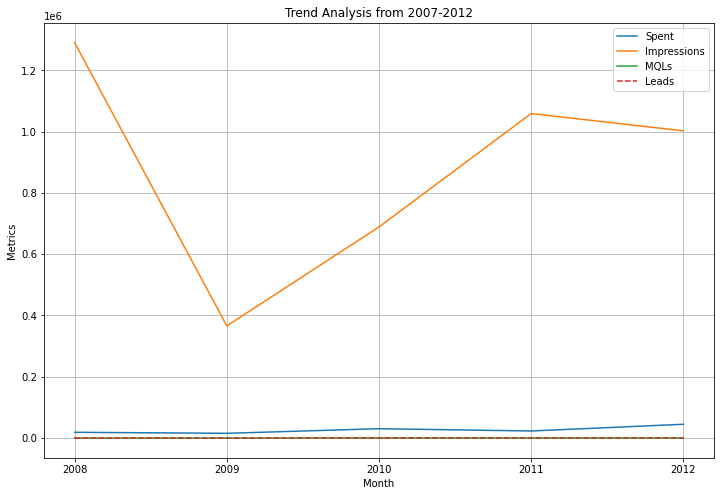

In [24]:
## trend analysis by year

filtered_data = df[df['created_date'].dt.year.between(2008, 2012)]

# Group by month and aggregate metrics
grouped_data = filtered_data.groupby(filtered_data['created_date'].dt.to_period('Y')).agg({
    'spent': 'sum',
    'impressions': 'sum',
    'leads': 'sum',
    'mqls': 'sum'
}).reset_index()

# Plot the trend for each metric
plt.figure(figsize=(12, 8))

plt.plot(grouped_data['created_date'].astype(str), grouped_data['spent'], label='Spent')
plt.plot(grouped_data['created_date'].astype(str), grouped_data['impressions'], label='Impressions')
plt.plot(grouped_data['created_date'].astype(str), grouped_data['mqls'], label='MQLs')

# Plot leads separately
plt.plot(grouped_data['created_date'].astype(str), grouped_data['leads'], label='Leads', linestyle='dashed')

plt.title('Trend Analysis from 2007-2012')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Key metrics

In [85]:
##calculating CRT only for experiments that have more than 0 impressions 
# Group by experiment_id and sum the leads and impressions
experiment_data = df.groupby('experiment_id')[['impressions','spent','mqls','leads']].sum().sort_values(by='spent', ascending=False).reset_index()

# Filter out experiments where either leads or impressions are zero
non_zero_data = experiment_data[(experiment_data['leads'] != 0) & (experiment_data['impressions'] != 0)]

# Calculate Click-Through Rate (CTR) only for experiments with non-zero impressions
non_zero_data['CTR'] = round((non_zero_data['leads'] / non_zero_data['impressions']) * 100, 2)

# Calculate Cost Per Lead (CPL)
non_zero_data_cpl = experiment_data[(experiment_data['spent'] != 0) & (experiment_data['leads'] != 0)]

non_zero_data['CPL'] = round((non_zero_data_cpl['spent'] / non_zero_data_cpl['leads'])*100,2)

# Calculate Cost Per Click (CPC)
non_zero_data_cpc = experiment_data[(experiment_data['spent'] != 0) & (experiment_data['impressions'] != 0)]

non_zero_data['CPC'] = round((non_zero_data['spent'] / non_zero_data['impressions'])*100,2)

## some other metrics that might be helpful 

# Engagement Rate: impressions to lead ration(ideally devide clicks by the sum of all the product engagments )'
non_zero_data_eng = experiment_data[(experiment_data['leads'] != 0) & (experiment_data['impressions'] != 0)]

non_zero_data['engagment_rate'] = round((non_zero_data_eng ['leads'] / non_zero_data_eng['impressions'])*100,2)

# Lead to MQL Rate: The percentage of leads that convert into MQLs.
non_zero_data_mql = experiment_data[(experiment_data['leads'] != 0) & (experiment_data['mqls'] != 0)]

non_zero_data['conversion_rate'] = round((non_zero_data_mql['mqls'] / non_zero_data_mql['leads'])*100,2)

# Cost Per MQL (CPA):Total Spent / Total MQLs
non_zero_data_cpmql = experiment_data[(experiment_data['spent'] != 0) & (experiment_data['mqls'] != 0)]

non_zero_data['CPMQL'] = round((non_zero_data_cpmql['spent'] / non_zero_data_cpmql['mqls'])*100,2)

# Sort the DataFrame by CTR in descending order
key_metrics = non_zero_data.sort_values(by='CTR', ascending=False)

print(key_metrics)

     experiment_id  impressions       spent  mqls  leads   CTR       CPL  \
585        1429870         66.0    67.77000     4      4  6.06   1694.25   
152        1329718        500.0   736.64000    25     30  6.00   2455.47   
420        1433343        117.0   134.33002     5      5  4.27   2686.60   
99         1280040        713.0  1124.51000    18     26  3.65   4325.04   
594        1429871         66.0    63.01000     2      2  3.03   3150.50   
..             ...          ...         ...   ...    ...   ...       ...   
267        1351515       7662.0   434.13000     1      1  0.01  43413.00   
238        1402354       9267.0   490.81000     1      1  0.01  49081.00   
234        1409480      10816.0   509.45000     1      1  0.01  50945.00   
224        1445361       7013.0   523.83000     1      1  0.01  52383.00   
408        1364355      16092.0   155.82000     0      2  0.01   7791.00   

        CPC  engagment_rate  conversion_rate     CPMQL  
585  102.68            6.06   

/var/folders/m8/k52xprdj6rgfzvcww37100vc0000gn/T/ipykernel_40377/3509944789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_data['CTR'] = round((non_zero_data['leads'] / non_zero_data['impressions']) * 100, 2)
/var/folders/m8/k52xprdj6rgfzvcww37100vc0000gn/T/ipykernel_40377/3509944789.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_data['CPL'] = round((non_zero_data_cpl['spent'] / non_zero_data_cpl['leads'])*100,2)
/var/folders/m8/k52xprdj6rgfzvcww37100vc0000gn/T/ipykernel_40377/3

In [26]:
## most days most project spend over budget 630 project didn't spend over budget  

# Predictive Modeling:

In [27]:
##encoding catagorical variables:

encoded_df = pd.get_dummies(df, columns=['wiz_campaign_channel','experiment_goal','offer_library_type','ad_library_type'])
encoded_df_without_adlibrary = pd.get_dummies(df, columns=['wiz_campaign_channel','experiment_goal','offer_library_type'])
encoded_campaign_channel = pd.get_dummies(df, columns=['wiz_campaign_channel'])
encoded_offer_library_type = pd.get_dummies(df, columns=['offer_library_type'])
encoded_ad_library_type = pd.get_dummies(df, columns=['ad_library_type'])



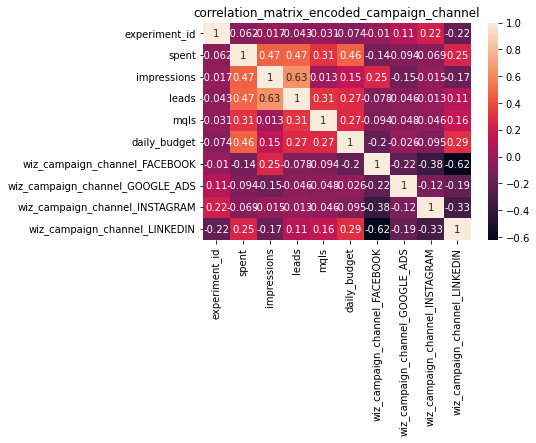

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [29]:
## heatmap to show corelation of features to MQLs
correlation_matrix_encoded_campaign_channel = encoded_campaign_channel.corr()
sns.heatmap(correlation_matrix_encoded_campaign_channel, annot=True)
plt.title('correlation_matrix_encoded_campaign_channel')
plt.show()
plt.figure(figsize=(20, 20)) 

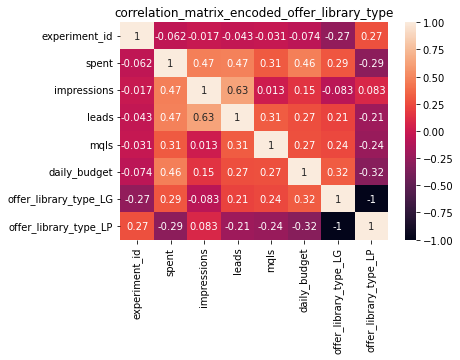

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [30]:
correlation_matrix_encoded_offer_library_type = encoded_offer_library_type.corr()
sns.heatmap(correlation_matrix_encoded_offer_library_type, annot=True)
plt.title('correlation_matrix_encoded_offer_library_type')
plt.show()
plt.figure(figsize=(20, 20)) 

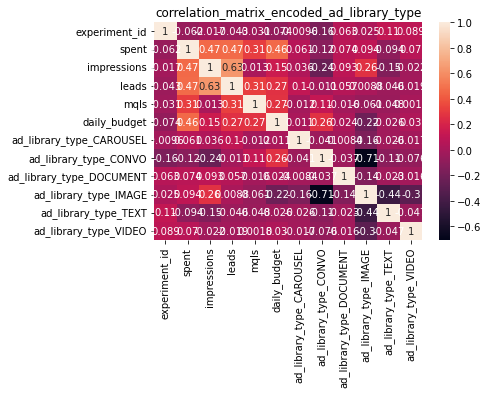

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [31]:
correlation_matrix_encoded_ad_library_type = encoded_ad_library_type.corr()
sns.heatmap(correlation_matrix_encoded_ad_library_type, annot=True)
plt.title('correlation_matrix_encoded_ad_library_type')
plt.show()
plt.figure(figsize=(20, 20)) 


In [86]:
#RandomForestRegressor models and evaluion metrics 

encoded_df_without_experiment_goal = pd.get_dummies(df, columns=['wiz_campaign_channel','offer_library_type','ad_library_type'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target variable
features = encoded_df_without_experiment_goal.drop(columns=['mqls', 'created_date','experiment_goal'])
target = encoded_df_without_experiment_goal['mqls']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 0.006516072811773818
Mean Absolute Error: 0.011522075910147173
R-squared (R2) Score: 0.9239742963298723
Root Mean Squared Error (RMSE): 0.08072219528589282


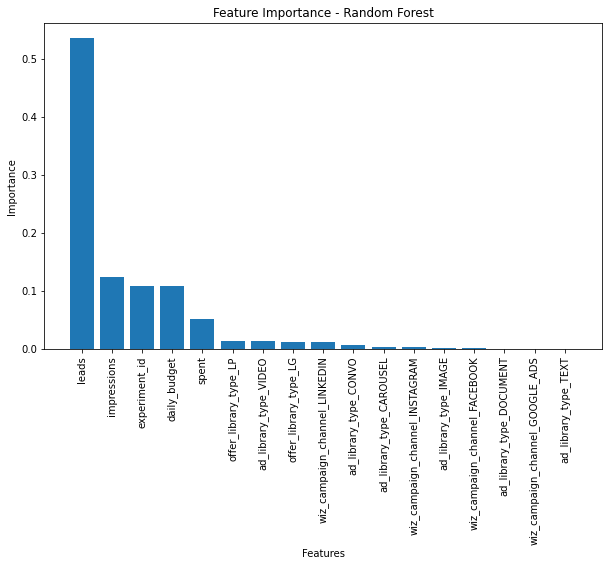

In [64]:
#feature importance

# Initialize the Random Forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_reg.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = features.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, feature_importances[sorted_indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=90)
plt.show()

In [87]:
## xgboost model

import xgboost as xgb


# Define features and target variable
features = encoded_df_without_experiment_goal.drop(columns=['mqls','created_date','experiment_goal'])
target = encoded_df_without_experiment_goal['mqls']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model to the training data
xgb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 0.020631194365691694
Mean Absolute Error: 0.0359155182968797
R-squared (R2) Score: 0.7592873630305697
Root Mean Squared Error (RMSE): 0.14363563055764295


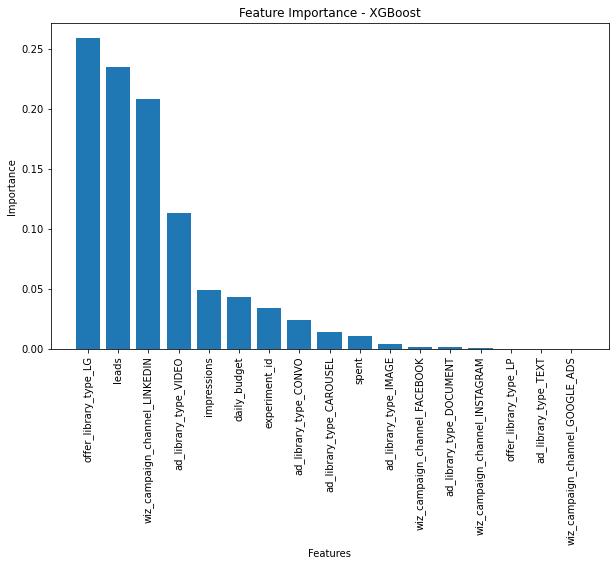

In [65]:
#feature importance on XGBoost model

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_reg.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_reg.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = features.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, feature_importances[sorted_indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.xticks(rotation=90)
plt.show()

In [89]:
## support vector machine model 

from sklearn.svm import SVR

# Define features and target variable
features = encoded_df_without_experiment_goal.drop(columns=['mqls','created_date','experiment_goal'])
target = encoded_df_without_experiment_goal['mqls']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the SVR model
svm_reg = SVR(kernel='rbf')

# Fit the model to the training data
svm_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_reg.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error (SVM):", mse_svm)

# Calculate Mean Absolute Error (MAE)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Calculate R-squared (R2) Score
r2_svm = r2_score(y_test, y_pred_svm)

# Calculate Root Mean Squared Error (RMSE)
rmse_svm = np.sqrt(mse_svm)

print("Mean Absolute Error (SVM):", mae_svm)
print("R-squared (R2) Score (SVM):", r2_svm)
print("Root Mean Squared Error (RMSE) (SVM):", rmse_svm)

Mean Squared Error (SVM): 0.08776253385884383
Mean Absolute Error (SVM): 0.14616924995831299
R-squared (R2) Score (SVM): -0.023961607739569457
Root Mean Squared Error (RMSE) (SVM): 0.2962474200036919


In [90]:
from sklearn.neighbors import KNeighborsRegressor

# Define features and target variable
features = encoded_df_without_experiment_goal.drop(columns=['mqls','created_date','experiment_goal'])
target = encoded_df_without_experiment_goal['mqls']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_reg.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (KNN):", mse_knn)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

print("Mean Absolute Error (KNN):", mae_knn)
print("R-squared (R2) Score (KNN):", r2_knn)
print("Root Mean Squared Error (RMSE) (KNN):", rmse_knn)


Mean Squared Error (KNN): 0.07327652982184354
Mean Absolute Error (KNN): 0.07141750580945004
R-squared (R2) Score (KNN): 0.14505256415416945
Root Mean Squared Error (RMSE) (KNN): 0.2706963794029088


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
features = encoded_df_without_experiment_goal.drop(columns=['mqls', 'created_date', 'experiment_goal'])
target = encoded_df_without_experiment_goal['mqls']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9570100697134004
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2474
           1       0.00      0.00      0.00        84
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.96      2582
   macro avg       0.19      0.20      0.20      2582
weighted avg       0.92      0.96      0.94      2582



/Users/ssarkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ssarkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssarkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score

experiment_id: 4.213133305823806e-06
spent: -0.001652488347970695
impressions: 2.2665408145175877e-05
leads: -2.0528930725129458e-05
daily_budget: -0.002482452312978676
wiz_campaign_channel_FACEBOOK: 4.239662217227751e-06
wiz_campaign_channel_GOOGLE_ADS: 1.0479854075603498e-06
wiz_campaign_channel_INSTAGRAM: 1.2048719124615117e-06
wiz_campaign_channel_LINKEDIN: -6.482802919439428e-06
offer_library_type_LG: -1.0045492553628963e-05
offer_library_type_LP: 1.0055209171423966e-05
ad_library_type_CAROUSEL: 7.523587209534866e-08
ad_library_type_CONVO: -3.6184896129701083e-06
ad_library_type_DOCUMENT: 1.1534726017896036e-07
ad_library_type_IMAGE: 2.5437559455381703e-06
ad_library_type_TEXT: 1.0479854075603498e-06
ad_library_type_VIDEO: -1.541182546171998e-07


/Users/ssarkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


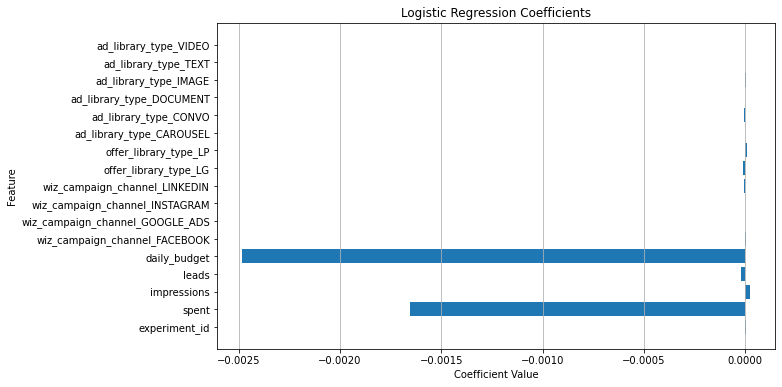

In [63]:
# Define features and target variable
features = encoded_df_without_experiment_goal.drop(columns=['mqls', 'created_date', 'experiment_goal'])
target = encoded_df_without_experiment_goal['mqls']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Get the coefficients (feature importances) of the model
feature_importance = log_reg.coef_[0]

# Print the feature importances
for feature, importance in zip(features.columns, feature_importance):
    print(f"{feature}: {importance}")
# Get feature names
feature_names = features.columns

# Get coefficients
coefficients = log_reg.coef_[0]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()

# Thank you!